In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Perceptrón Multi Capa

## Capas

In [2]:
class Layer:
    def __init__(self):
        self.params = []  # Parametros
        self.grads = []  # Gradiantes
        
    def __call__(self, x):
        return x
    
    def backward(self, grad):
        return grad
    
    def update(self, params):
        '''Si hay parámetros, los actualizaremos con
        el resultado que indique el optimizer'''
        return

In [3]:
class Linear(Layer):
    def __init__(self, dim_in, dim_out):
        self.weigths = np.random.normal(loc=0.0,
                                        scale=np.sqrt(2/(dim_in+dim_out)),
                                        size=(dim_in, dim_out))
        self.bias = np.zeros(dim_out)
        
    def __call__(self, x):
        self.x = x
        self.params = [self.weigths, self.bias]
        return np.dot(x, self.weigths) + self.bias  # Salida del perceptrón
    
    def backward(self, grad_output):
        # gradiantes para la capa siguiente
        grad = np.dot(grad_output, self.weigths.T)
        self.grad_weigths = np.dot(self.x.T, grad_output)
        
        # gradiantes para actualizar pesos
        self.grad_bias = grad_output.mean(axis=0) * self.x.shape[0]
        self.grads = [self.grad_weigths, self.grad_bias]
        return grad
    
    def update(self, params):
        self.weigths, self.bias = params

In [4]:
class ReLU(Layer):
    def __call__(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, grad_output):
        grad = self.x > 0
        return grad_output * grad

In [5]:
class Sigmoid(Layer):
    def __activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __call__(self, x):
        self.x = x
        return self.__activation(x)
    
    def backward(self, grad_output):
        sigmoid = self.__activation(self.x)
        grad = sigmoid * (1 - sigmoid)
        return grad_output * grad

## Percetrón

In [6]:
class MLP:
    def __init__(self, layers):
        self.layers = layers
    
    def __call__(self, x):
        '''Calculamos la salida del modelo aplicando
        cada capa de manera secuencial
        '''
        for layer in self.layers:
            x = layer(x)
        return x

## Optimización 
Algoritmo de optimización

In [7]:
class SGD():
    '''Stochastic gradient descent
    '''
    def __init__(self, net, lr):
        self.net = net
        self.lr = lr
        
    def update(self):
        for layer in self.net.layers:
            layer.update([
                params - self.lr * grads
                for params, grads in zip(layer.params, layer.grads)
            ])

## Funciones de Pérdida

In [8]:
class Loss():
    def __init__(self, net):
        self.net = net
        
    def backward(self):
        '''Derivada de la loss function con respeto
        a la salida del MLP'''
        grad = self.grad_loss()
        
        # backpropagation
        for layer in reversed(self.net.layers):
            grad = layer.backward(grad)        

In [9]:
class MSE(Loss):
    '''Mean Square Error
    '''
    def __call__(self, output, target):
        self.output, self.target = output, target.reshape(output.shape)
        loss = np.mean((self.grad_loss()) ** 2)
        return loss.mean()
    
    def grad_loss(self):
        return self.output - self.target

## Implementación

In [10]:
xor = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 1]
])

In [11]:
x_1 = xor.T[0]
x_2 = xor.T[1]
x_3 = xor.T[2]
y = xor.T[3]

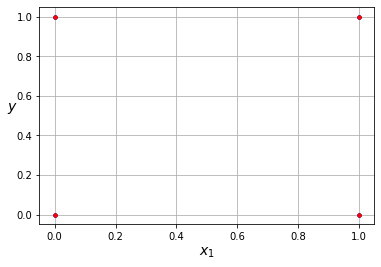

In [12]:
plt.plot(x_1, y, "g.")
plt.plot(x_2, y, "b.")
plt.plot(x_3, y, "r.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [13]:
dim_in, hide, dim_out = 3, 3, 1

mlp = MLP([
    Linear(dim_in, hide),
    Sigmoid(),
    Linear(hide, dim_out)
])

optimizer = SGD(mlp, lr=0.01)
loss = MSE(mlp)

In [14]:
epochs = 100
l_error = []
for epoch in range(epochs):
    _l = []
    for batch, x in enumerate(xor):
        y_pred = mlp(x[0:3].reshape((1, 3)))
        _l.append(loss(y_pred, x[-1]))
        loss.backward()
        optimizer.update()
        print(f'epoch: {epoch + 1}, batch: {batch + 1}, input: {x[0:3]}, output: {x[-1]}, prediction: {y_pred[0, 0]:.4f}, error: {_l[-1]:.4f}')
    l_error.append(np.mean(_l))
    print(f'epoch: {epoch + 1}, loss: {np.mean(l_error):.4f}')

epoch: 1, batch: 1, input: [0 0 0], output: 0, prediction: 0.8348, error: 0.6969
epoch: 1, batch: 2, input: [0 0 1], output: 1, prediction: 1.0166, error: 0.0003
epoch: 1, batch: 3, input: [0 1 0], output: 1, prediction: 0.7894, error: 0.0444
epoch: 1, batch: 4, input: [0 1 1], output: 0, prediction: 0.9888, error: 0.9778
epoch: 1, batch: 5, input: [1 0 0], output: 1, prediction: 0.9489, error: 0.0026
epoch: 1, batch: 6, input: [1 0 1], output: 0, prediction: 1.1446, error: 1.3100
epoch: 1, batch: 7, input: [1 1 0], output: 0, prediction: 0.8935, error: 0.7983
epoch: 1, batch: 8, input: [1 1 1], output: 1, prediction: 1.0542, error: 0.0029
epoch: 1, loss: 0.4791
epoch: 2, batch: 1, input: [0 0 0], output: 0, prediction: 0.7617, error: 0.5803
epoch: 2, batch: 2, input: [0 0 1], output: 1, prediction: 0.9359, error: 0.0041
epoch: 2, batch: 3, input: [0 1 0], output: 1, prediction: 0.7134, error: 0.0822
epoch: 2, batch: 4, input: [0 1 1], output: 0, prediction: 0.9072, error: 0.8230
epoch

epoch: 37, batch: 1, input: [0 0 0], output: 0, prediction: 0.3917, error: 0.1534
epoch: 37, batch: 2, input: [0 0 1], output: 1, prediction: 0.5211, error: 0.2293
epoch: 37, batch: 3, input: [0 1 0], output: 1, prediction: 0.3359, error: 0.4410
epoch: 37, batch: 4, input: [0 1 1], output: 0, prediction: 0.4943, error: 0.2443
epoch: 37, batch: 5, input: [1 0 0], output: 1, prediction: 0.5256, error: 0.2250
epoch: 37, batch: 6, input: [1 0 1], output: 0, prediction: 0.6749, error: 0.4555
epoch: 37, batch: 7, input: [1 1 0], output: 0, prediction: 0.4614, error: 0.2129
epoch: 37, batch: 8, input: [1 1 1], output: 1, prediction: 0.5842, error: 0.1729
epoch: 37, loss: 0.2865
epoch: 38, batch: 1, input: [0 0 0], output: 0, prediction: 0.3917, error: 0.1534
epoch: 38, batch: 2, input: [0 0 1], output: 1, prediction: 0.5209, error: 0.2295
epoch: 38, batch: 3, input: [0 1 0], output: 1, prediction: 0.3361, error: 0.4407
epoch: 38, batch: 4, input: [0 1 1], output: 0, prediction: 0.4943, error:

epoch: 67, batch: 1, input: [0 0 0], output: 0, prediction: 0.3949, error: 0.1559
epoch: 67, batch: 2, input: [0 0 1], output: 1, prediction: 0.5190, error: 0.2313
epoch: 67, batch: 3, input: [0 1 0], output: 1, prediction: 0.3456, error: 0.4283
epoch: 67, batch: 4, input: [0 1 1], output: 0, prediction: 0.4977, error: 0.2477
epoch: 67, batch: 5, input: [1 0 0], output: 1, prediction: 0.5196, error: 0.2308
epoch: 67, batch: 6, input: [1 0 1], output: 0, prediction: 0.6641, error: 0.4410
epoch: 67, batch: 7, input: [1 1 0], output: 0, prediction: 0.4622, error: 0.2136
epoch: 67, batch: 8, input: [1 1 1], output: 1, prediction: 0.5802, error: 0.1762
epoch: 67, loss: 0.2774
epoch: 68, batch: 1, input: [0 0 0], output: 0, prediction: 0.3950, error: 0.1560
epoch: 68, batch: 2, input: [0 0 1], output: 1, prediction: 0.5190, error: 0.2314
epoch: 68, batch: 3, input: [0 1 0], output: 1, prediction: 0.3459, error: 0.4278
epoch: 68, batch: 4, input: [0 1 1], output: 0, prediction: 0.4978, error:

epoch: 94, batch: 5, input: [1 0 0], output: 1, prediction: 0.5155, error: 0.2347
epoch: 94, batch: 6, input: [1 0 1], output: 0, prediction: 0.6558, error: 0.4301
epoch: 94, batch: 7, input: [1 1 0], output: 0, prediction: 0.4636, error: 0.2149
epoch: 94, batch: 8, input: [1 1 1], output: 1, prediction: 0.5775, error: 0.1785
epoch: 94, loss: 0.2739
epoch: 95, batch: 1, input: [0 0 0], output: 0, prediction: 0.3985, error: 0.1588
epoch: 95, batch: 2, input: [0 0 1], output: 1, prediction: 0.5180, error: 0.2323
epoch: 95, batch: 3, input: [0 1 0], output: 1, prediction: 0.3545, error: 0.4167
epoch: 95, batch: 4, input: [0 1 1], output: 0, prediction: 0.5012, error: 0.2512
epoch: 95, batch: 5, input: [1 0 0], output: 1, prediction: 0.5153, error: 0.2349
epoch: 95, batch: 6, input: [1 0 1], output: 0, prediction: 0.6555, error: 0.4297
epoch: 95, batch: 7, input: [1 1 0], output: 0, prediction: 0.4636, error: 0.2150
epoch: 95, batch: 8, input: [1 1 1], output: 1, prediction: 0.5774, error:

In [15]:
dim_in, hide, dim_out = 3, 3, 1

mlp = MLP([
    Linear(dim_in, hide),
    ReLU(),
    Linear(hide, dim_out)
])

optimizer = SGD(mlp, lr=0.01)
loss = MSE(mlp)

In [16]:
epochs = 100
l_error = []
for epoch in range(epochs):
    _l = []
    for batch, x in enumerate(xor):
        y_pred = mlp(x[0:3].reshape((1, 3)))
        _l.append(loss(y_pred, x[-1]))
        loss.backward()
        optimizer.update()
        print(f'epoch: {epoch + 1}, batch: {batch + 1}, input: {x[0:3]}, output: {x[-1]}, prediction: {y_pred[0, 0]:.4f}, error: {_l[-1]:.4f}')
    l_error.append(np.mean(_l))
    print(f'epoch: {epoch + 1}, loss: {np.mean(l_error):.4f}')

epoch: 1, batch: 1, input: [0 0 0], output: 0, prediction: 0.0000, error: 0.0000
epoch: 1, batch: 2, input: [0 0 1], output: 1, prediction: -0.0262, error: 1.0531
epoch: 1, batch: 3, input: [0 1 0], output: 1, prediction: -0.2106, error: 1.4656
epoch: 1, batch: 4, input: [0 1 1], output: 0, prediction: 0.0224, error: 0.0005
epoch: 1, batch: 5, input: [1 0 0], output: 1, prediction: 0.9630, error: 0.0014
epoch: 1, batch: 6, input: [1 0 1], output: 0, prediction: 0.9052, error: 0.8194
epoch: 1, batch: 7, input: [1 1 0], output: 0, prediction: 0.5793, error: 0.3356
epoch: 1, batch: 8, input: [1 1 1], output: 1, prediction: 0.6954, error: 0.0928
epoch: 1, loss: 0.4710
epoch: 2, batch: 1, input: [0 0 0], output: 0, prediction: 0.0107, error: 0.0001
epoch: 2, batch: 2, input: [0 0 1], output: 1, prediction: -0.0146, error: 1.0293
epoch: 2, batch: 3, input: [0 1 0], output: 1, prediction: -0.1967, error: 1.4321
epoch: 2, batch: 4, input: [0 1 1], output: 0, prediction: 0.0327, error: 0.0011
e

epoch: 49, batch: 5, input: [1 0 0], output: 1, prediction: 0.7479, error: 0.0636
epoch: 49, batch: 6, input: [1 0 1], output: 0, prediction: 0.5964, error: 0.3557
epoch: 49, batch: 7, input: [1 1 0], output: 0, prediction: 0.4642, error: 0.2155
epoch: 49, batch: 8, input: [1 1 1], output: 1, prediction: 0.4469, error: 0.3059
epoch: 49, loss: 0.3283
epoch: 50, batch: 1, input: [0 0 0], output: 0, prediction: 0.3765, error: 0.1418
epoch: 50, batch: 2, input: [0 0 1], output: 1, prediction: 0.3727, error: 0.3935
epoch: 50, batch: 3, input: [0 1 0], output: 1, prediction: 0.2777, error: 0.5217
epoch: 50, batch: 4, input: [0 1 1], output: 0, prediction: 0.3862, error: 0.1492
epoch: 50, batch: 5, input: [1 0 0], output: 1, prediction: 0.7463, error: 0.0644
epoch: 50, batch: 6, input: [1 0 1], output: 0, prediction: 0.5944, error: 0.3533
epoch: 50, batch: 7, input: [1 1 0], output: 0, prediction: 0.4640, error: 0.2153
epoch: 50, batch: 8, input: [1 1 1], output: 1, prediction: 0.4460, error:

epoch: 86, batch: 2, input: [0 0 1], output: 1, prediction: 0.4554, error: 0.2966
epoch: 86, batch: 3, input: [0 1 0], output: 1, prediction: 0.4117, error: 0.3461
epoch: 86, batch: 4, input: [0 1 1], output: 0, prediction: 0.4667, error: 0.2178
epoch: 86, batch: 5, input: [1 0 0], output: 1, prediction: 0.6526, error: 0.1207
epoch: 86, batch: 6, input: [1 0 1], output: 0, prediction: 0.4655, error: 0.2167
epoch: 86, batch: 7, input: [1 1 0], output: 0, prediction: 0.3858, error: 0.1488
epoch: 86, batch: 8, input: [1 1 1], output: 1, prediction: 0.4570, error: 0.2948
epoch: 86, loss: 0.2965
epoch: 87, batch: 1, input: [0 0 0], output: 0, prediction: 0.4624, error: 0.2139
epoch: 87, batch: 2, input: [0 0 1], output: 1, prediction: 0.4578, error: 0.2940
epoch: 87, batch: 3, input: [0 1 0], output: 1, prediction: 0.4158, error: 0.3413
epoch: 87, batch: 4, input: [0 1 1], output: 0, prediction: 0.4691, error: 0.2200
epoch: 87, batch: 5, input: [1 0 0], output: 1, prediction: 0.6555, error: